In [59]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import LabelEncoder

In [60]:
# Read excel files to DataFrames
df1 = pd.read_excel('C:\\Users\\nicks\\OneDrive\\Desktop\\Coding\\Challenge_Files\\NFL_Metrics_Project\\NFL_advanced_metrcis_project\\Resources\\sportsref_download_Air_yards.xls.xlsx')
df2 = pd.read_excel('C:\\Users\\nicks\\OneDrive\\Desktop\\Coding\\Challenge_Files\\NFL_Metrics_Project\\NFL_advanced_metrcis_project\\Resources\\sportsref_download_Accuracy.xls.xlsx')
df3 = pd.read_excel('C:\\Users\\nicks\\OneDrive\\Desktop\\Coding\\Challenge_Files\\NFL_Metrics_Project\\NFL_advanced_metrcis_project\\Resources\\sportsref_download_Play_Type.xls.xlsx')
df4 = pd.read_excel('C:\\Users\\nicks\\OneDrive\\Desktop\\Coding\\Challenge_Files\\NFL_Metrics_Project\\NFL_advanced_metrcis_project\\Resources\\sportsref_download_Pressure.xls.xlsx')
df5 = pd.read_excel('C:\\Users\\nicks\\OneDrive\\Desktop\\Coding\\Challenge_Files\\NFL_Metrics_Project\\NFL_advanced_metrcis_project\\Resources\\sportsref_download_Receiving.xlsx')
df6 = pd.read_excel('C:\\Users\\nicks\\OneDrive\\Desktop\\Coding\\Challenge_Files\\NFL_Metrics_Project\\NFL_advanced_metrcis_project\\Resources\\sportsref_download_Rushing.xlsx')

# Collect dataframes in library
dataframes = [df1, df2, df3, df4, df5, df6]

In [61]:
# Initialize the result with the first dataframe
result = dataframes[0]

# Merge each dataframe one by one and add suffixes for duplicate columns
for i, df in enumerate(dataframes[1:], start=1):
    result = pd.merge(result, df, on='Tm', how='outer', suffixes=('', f'_df{i}'))

# Create function to drop duplicate columns
columns_to_drop = []
columns_to_rename = {}

for col in result.columns:
    if any(col.endswith(f'_df{i}') for i in range(1, len(dataframes))):
        base_col = col.rsplit('_df', 1)[0]
        if base_col in result.columns:
            columns_to_drop.append(col)
        else:
            columns_to_rename[col] = base_col

# Drop the columns that have been identified as a duplicate
result.drop(columns=columns_to_drop, inplace=True)

# Rename the columns that need to be renamed
result.rename(columns=columns_to_rename, inplace=True)

print(result)

                       Tm   G   W   L  Cmp  Att   Yds   IAY  IAY/PA   CAY  \
0         Atlanta Falcons  17   7  10  327  530  3524  4345     8.2  2007   
1           Buffalo Bills  17  11   6  385  579  4154  5032     8.7  2337   
2       Carolina Panthers  17   2  15  350  586  2741  4454     7.6  1801   
3           Chicago Bears  17   7  10  321  513  3096  3801     7.4  1700   
4      Cincinnati Bengals  17   9   8  420  615  3895  3855     6.3  1889   
5        Cleveland Browns  17  11   6  355  624  3693  5250     8.4  2158   
6      Indianapolis Colts  17   9   8  355  574  3666  4248     7.4  2019   
7       Arizona Cardinals  17   4  13  355  555  3144  4193     7.6  1752   
8          Dallas Cowboys  17  12   5  428  614  4397  4800     7.8  2617   
9          Denver Broncos  17   8   9  337  513  3262  3770     7.3  1497   
10          Detroit Lions  17  12   5  408  606  4401  4086     6.7  2450   
11      Green Bay Packers  17   9   8  374  581  3968  4945     8.5  2285   

In [62]:
# Assigning to a new dataframe
NFL_advanced_metrics_df = result
NFL_advanced_metrics_df.head()

,Tm,G,W,L,Cmp,Att,Yds,IAY,IAY/PA,CAY,...,YBC,YBC/R,YAC/R,ADOT,BrkTkl,Rec/Br,Drop,YBC/Att,YAC/Att,Att/Br
0,Atlanta Falcons,17,7,10,327,530,3524,4345,8.2,2007,...,2007,6.1,5.4,7.9,22,14.9,25,2.4,1.7,15.4
1,Buffalo Bills,17,11,6,385,579,4154,5032,8.7,2337,...,2337,6.1,5.1,8.1,29,13.3,31,2.5,1.8,21.3
2,Carolina Panthers,17,2,15,350,586,2741,4454,7.6,1801,...,1801,5.1,4.1,6.9,21,16.7,28,2.2,1.8,13.1
3,Chicago Bears,17,7,10,321,513,3096,3801,7.4,1700,...,1700,5.3,5.4,6.8,29,11.1,19,2.9,1.6,16.7
4,Cincinnati Bengals,17,9,8,420,615,3895,3855,6.3,1889,...,1889,4.5,5.6,6.0,20,21.0,30,2.5,1.5,31.9


In [63]:
print(NFL_advanced_metrics_df.describe())

          G          W          L        Cmp        Att          Yds  \
count  32.0  32.000000  32.000000   32.00000   32.00000    32.000000   
mean   17.0   8.500000   8.500000  369.00000  572.34375  3721.718750   
std     0.0   2.747433   2.747433   34.82676   45.21462   512.028366   
min    17.0   2.000000   4.000000  304.00000  491.00000  2741.000000   
25%    17.0   7.000000   6.000000  345.50000  548.75000  3237.250000   
50%    17.0   9.000000   8.000000  362.50000  577.00000  3823.000000   
75%    17.0  11.000000  10.000000  406.25000  608.00000  4133.000000   
max    17.0  13.000000  15.000000  428.00000  636.00000  4514.000000   

               IAY     IAY/PA         CAY    CAY/Cmp  ...         YBC  \
count    32.000000  32.000000    32.00000  32.000000  ...    32.00000   
mean   4430.750000   7.756250  2090.50000   5.671875  ...  2091.50000   
std     461.484771   0.703878   338.94923   0.762523  ...   338.68579   
min    3770.000000   6.300000  1497.00000   4.100000  ...  

In [64]:
NFL_advanced_metrics_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 54 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Tm           32 non-null     object 
 1   G            32 non-null     int64  
 2   W            32 non-null     int64  
 3   L            32 non-null     int64  
 4   Cmp          32 non-null     int64  
 5   Att          32 non-null     int64  
 6   Yds          32 non-null     int64  
 7   IAY          32 non-null     int64  
 8   IAY/PA       32 non-null     float64
 9   CAY          32 non-null     int64  
 10  CAY/Cmp      32 non-null     float64
 11  CAY/PA       32 non-null     float64
 12  YAC          32 non-null     int64  
 13  YAC/Cmp      32 non-null     float64
 14  Bats         32 non-null     int64  
 15  ThAwy        32 non-null     int64  
 16  Spikes       32 non-null     int64  
 17  Drops        32 non-null     int64  
 18  Drop%        32 non-null     float64
 19  BadTh     

In [65]:
# Data Transformation: encoding categorical variables
# One-hot encoding column 'Tm'
NFL_advanced_metrics_df = pd.get_dummies(NFL_advanced_metrics_df, columns=['Tm'])
NFL_advanced_metrics_df.head()

,G,W,L,Cmp,Att,Yds,IAY,IAY/PA,CAY,CAY/Cmp,...,Tm_New Orleans Saints,Tm_New York Giants,Tm_New York Jets,Tm_Philadelphia Eagles,Tm_Pittsburgh Steelers,Tm_San Francisco 49ers,Tm_Seattle Seahawks,Tm_Tampa Bay Buccaneers,Tm_Tennessee Titans,Tm_Washington Commanders
0,17,7,10,327,530,3524,4345,8.2,2007,6.1,...,False,False,False,False,False,False,False,False,False,False
1,17,11,6,385,579,4154,5032,8.7,2337,6.1,...,False,False,False,False,False,False,False,False,False,False
2,17,2,15,350,586,2741,4454,7.6,1801,5.1,...,False,False,False,False,False,False,False,False,False,False
3,17,7,10,321,513,3096,3801,7.4,1700,5.3,...,False,False,False,False,False,False,False,False,False,False
4,17,9,8,420,615,3895,3855,6.3,1889,4.5,...,False,False,False,False,False,False,False,False,False,False


In [71]:
# Scaling and normalizing numerical features
scaler = StandardScaler()

# Identify numerical columns to scale
numerical_columns = NFL_advanced_metrics_df.select_dtypes(include=['float64', 'int64']).columns

# Applying standar scaler
NFL_advanced_metrics_df[numerical_columns] = scaler.fit_transform(NFL_advanced_metrics_df[numerical_columns])
# NFL_advanced_metrics_df.head()

<Axes: ylabel='Count'>

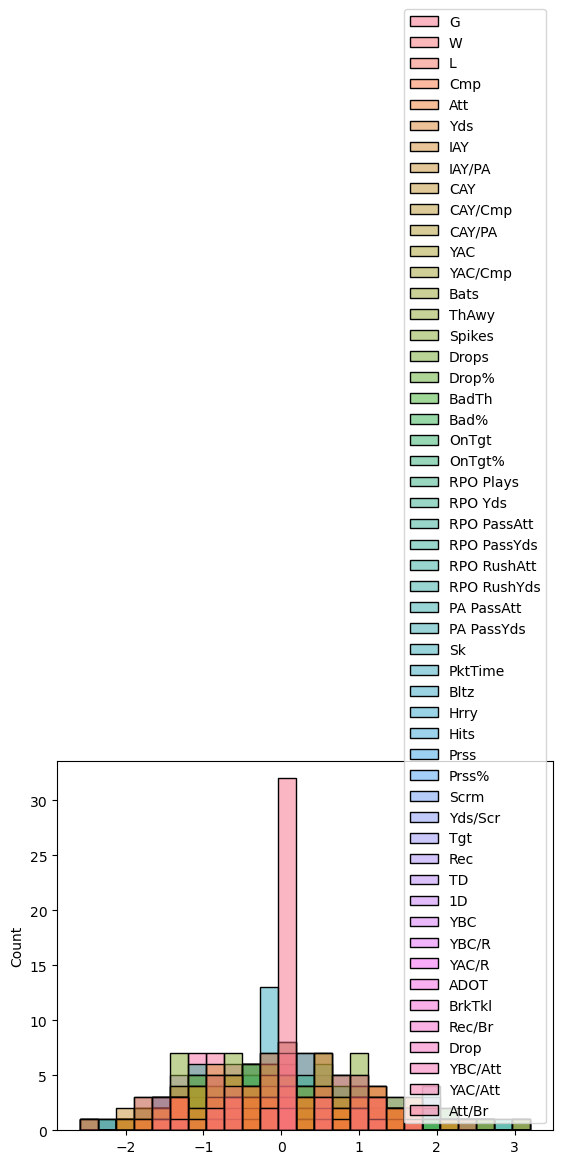

In [74]:
# Distribution plots
sns.histplot(NFL_advanced_metrics_df[numerical_columns])

<Axes: >

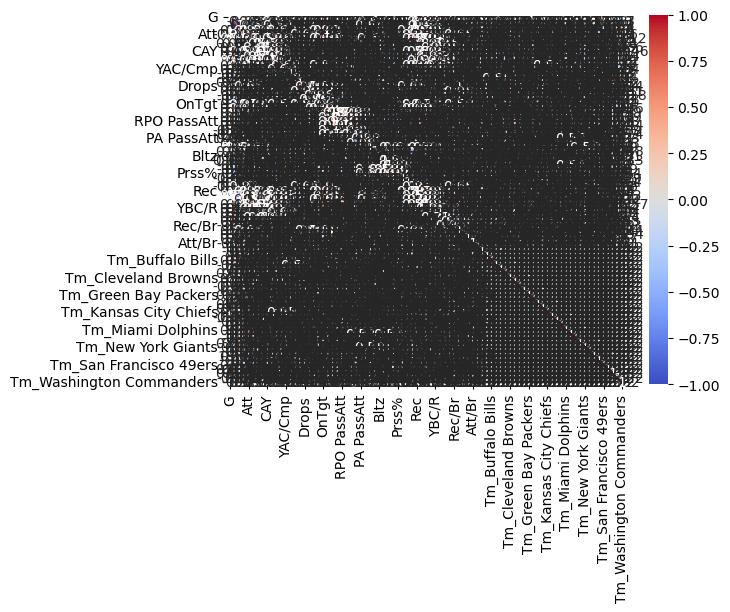

In [75]:
# Correlation heatmap
corr = NFL_advanced_metrics_df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')